# Extra info

In [1]:
age_trans = { 
    1 : '[07, 13]',
    2 : '[14, 18]',
    3 : '[19, 24]',
    4 : '[25, 32]',
    5 : '[33, 45]',
    6 : '[46, 60]',
    7 : '[61, inf]'
}
gender_trans = {
    1 : 'Male',
    2 : 'Female'
}

ethnic_trans = {
    1 : 'Asian',
    2 : 'Caucasian',
    3 : 'African-American'
}

# Load the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

root = 'data'

train_csv_file = os.path.join(root, 'train_set_age_labels.csv')
test_csv_file = os.path.join(root, 'test_set_age_labels.csv')
validation_csv_file = os.path.join(root, 'valid_set_age_labels.csv')

train_csv = pd.read_csv(train_csv_file)
test_csv = pd.read_csv(test_csv_file)
validation_csv = pd.read_csv(validation_csv_file)

train_csv['AgeGroup'] = train_csv['AgeGroup'].map(age_trans)
test_csv['AgeGroup'] = test_csv['AgeGroup'].map(age_trans)
validation_csv['AgeGroup'] = validation_csv['AgeGroup'].map(age_trans)

train_csv['Gender'] = train_csv['Gender'].map(gender_trans)
test_csv['Gender'] = test_csv['Gender'].map(gender_trans)
validation_csv['Gender'] = validation_csv['Gender'].map(gender_trans)

train_csv['Ethnicity'] = train_csv['Ethnicity'].map(ethnic_trans)
test_csv['Ethnicity'] = test_csv['Ethnicity'].map(ethnic_trans)
validation_csv['Ethnicity'] = validation_csv['Ethnicity'].map(ethnic_trans)

In [3]:
train_grouped = train_csv.groupby(['AgeGroup', 'Gender']).size().unstack()
test_grouped = test_csv.groupby(['AgeGroup', 'Gender']).size().unstack()
val_grouped = validation_csv.groupby(['AgeGroup', 'Gender']).size().unstack()

In [4]:
train_csv.to_csv('train_custom.csv', index=False)
test_csv.to_csv('test_custom.csv', index=False)
validation_csv.to_csv('validation_custom.csv', index=False)

# Main summary of the data

In [5]:
train_csv.describe()

,VideoName,UserID,AgeGroup,Gender,Ethnicity
count,6006,6006,6006,6006,6006
unique,6006,1836,7,2,3
top,YFm-8VGsUGg.004.mp4,jd9_8OPxM3A,"[25, 32]",Female,Caucasian
freq,1,6,2932,3322,5169


In [6]:
test_csv.describe()

,VideoName,UserID,AgeGroup,Gender,Ethnicity
count,1975,1975,1975,1975,1975
unique,1975,612,7,2,3
top,-9BZ8A9U7TE.000.mp4,VxtZDXM0cuQ,"[25, 32]",Female,Caucasian
freq,1,6,972,1061,1670


# How many genres

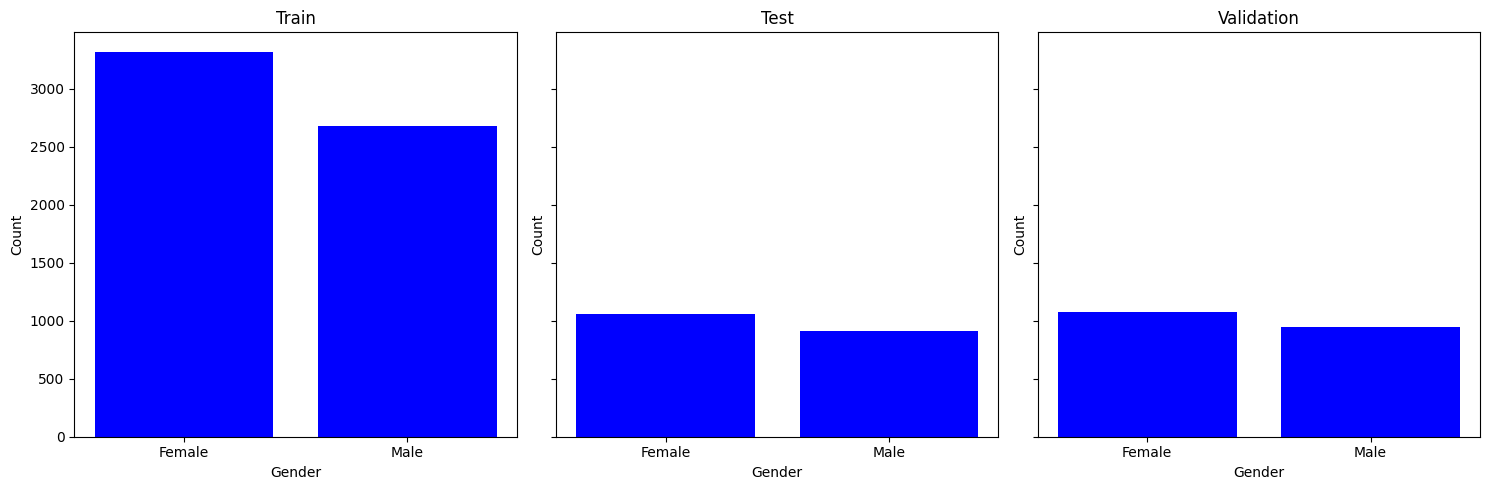

In [7]:
# Get unique ethnicities
genres = train_csv['Gender'].unique()

datasets = {'Train': train_csv, 'Test': test_csv, 'Validation': validation_csv}

fig, axes = plt.subplots(1, len(datasets), figsize=(15, 5), sharey=True)

for i, (dataset_name, dataset_df) in enumerate(datasets.items()):
    # Group data by ethnicity and count occurrences
    counts = dataset_df['Gender'].value_counts()
    
    # Plot bar plot for the current dataset
    axes[i].bar(counts.index, counts.values, color='blue')
    axes[i].set_title(dataset_name)
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

# How many ethnities

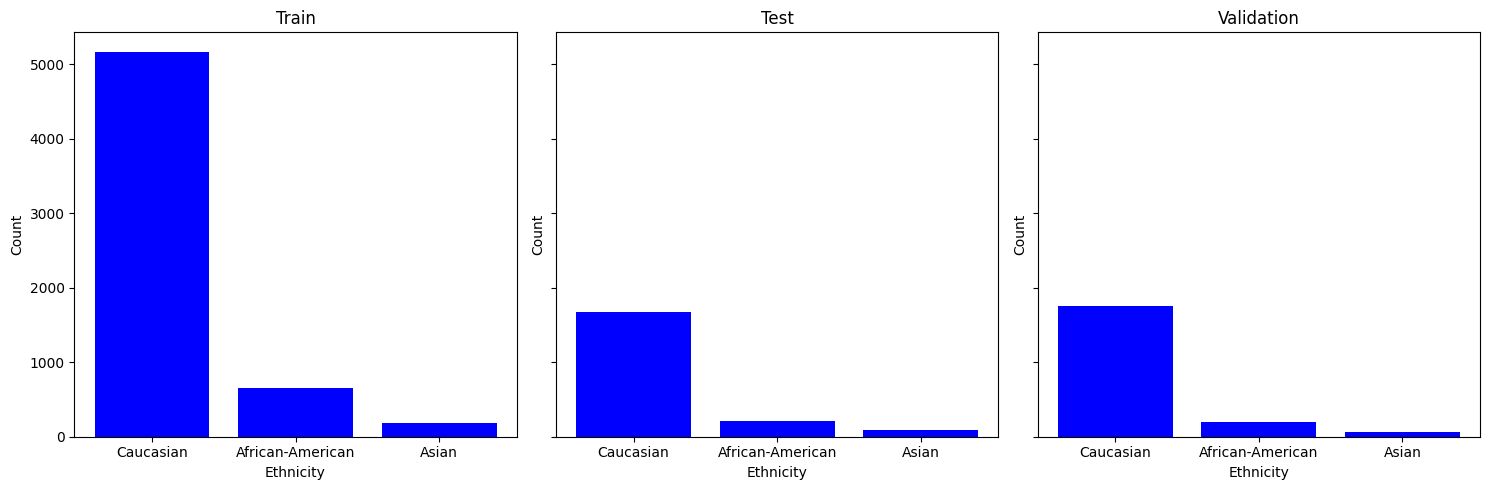

In [8]:
# Get unique ethnicities
ethnicities = train_csv['Ethnicity'].unique()

datasets = {'Train': train_csv, 'Test': test_csv, 'Validation': validation_csv}

fig, axes = plt.subplots(1, len(datasets), figsize=(15, 5), sharey=True)

for i, (dataset_name, dataset_df) in enumerate(datasets.items()):
    # Group data by ethnicity and count occurrences
    counts = dataset_df['Ethnicity'].value_counts()
    
    # Plot bar plot for the current dataset
    axes[i].bar(counts.index, counts.values, color='blue')
    axes[i].set_title(dataset_name)
    axes[i].set_xlabel('Ethnicity')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Plot of gender category

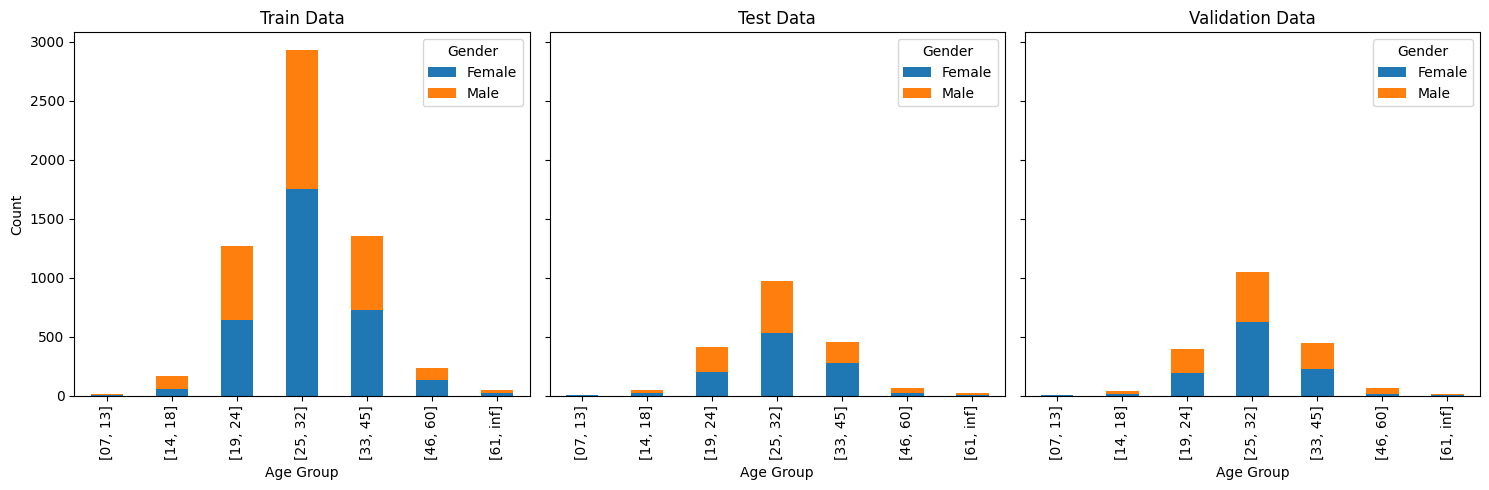

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot train data
train_grouped.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Train Data')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].legend(title='Gender')

# Plot test data
test_grouped.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Test Data')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')
axes[1].legend(title='Gender')

# Plot validation data
val_grouped.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Validation Data')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Count')
axes[2].legend(title='Gender')

plt.tight_layout()
plt.show()

In [10]:
# Get unique genders
genders = train_csv['Gender'].unique()

datasets = {'Train': train_csv, 'Test': test_csv, 'Validation': validation_csv}

for dataset_name, dataset_df in datasets.items():
    print(f"Dataset: {dataset_name}\n")
    for gender in genders:
        # Filter data by gender
        subset = dataset_df[dataset_df['Gender'] == gender]
        
        # Group the data by 'AgeGroup', and then count the occurrences in each group
        grouped = subset.groupby('AgeGroup').size()
        
        print(f"Gender: {gender}")
        print(grouped)
        print()

Dataset: Train

Gender: Female
AgeGroup
[07, 13]        5
[14, 18]       52
[19, 24]      640
[25, 32]     1750
[33, 45]      727
[46, 60]      129
[61, inf]      19
dtype: int64

Gender: Male
AgeGroup
[07, 13]        5
[14, 18]      112
[19, 24]      624
[25, 32]     1182
[33, 45]      626
[46, 60]      103
[61, inf]      32
dtype: int64

Dataset: Test

Gender: Female
AgeGroup
[07, 13]       4
[14, 18]      19
[19, 24]     203
[25, 32]     532
[33, 45]     273
[46, 60]      24
[61, inf]      6
dtype: int64

Gender: Male
AgeGroup
[07, 13]       1
[14, 18]      29
[19, 24]     207
[25, 32]     440
[33, 45]     185
[46, 60]      40
[61, inf]     12
dtype: int64

Dataset: Validation

Gender: Female
AgeGroup
[07, 13]       3
[14, 18]      14
[19, 24]     194
[25, 32]     620
[33, 45]     223
[46, 60]      15
[61, inf]      4
dtype: int64

Gender: Male
AgeGroup
[07, 13]       1
[14, 18]      28
[19, 24]     201
[25, 32]     429
[33, 45]     225
[46, 60]      50
[61, inf]     12
dtype: int64

# Plot of ethnicity

In [11]:
train_grouped = train_csv.groupby(['AgeGroup', 'Ethnicity']).size().unstack()
test_grouped = test_csv.groupby(['AgeGroup', 'Ethnicity']).size().unstack()
val_grouped = validation_csv.groupby(['AgeGroup', 'Ethnicity']).size().unstack()

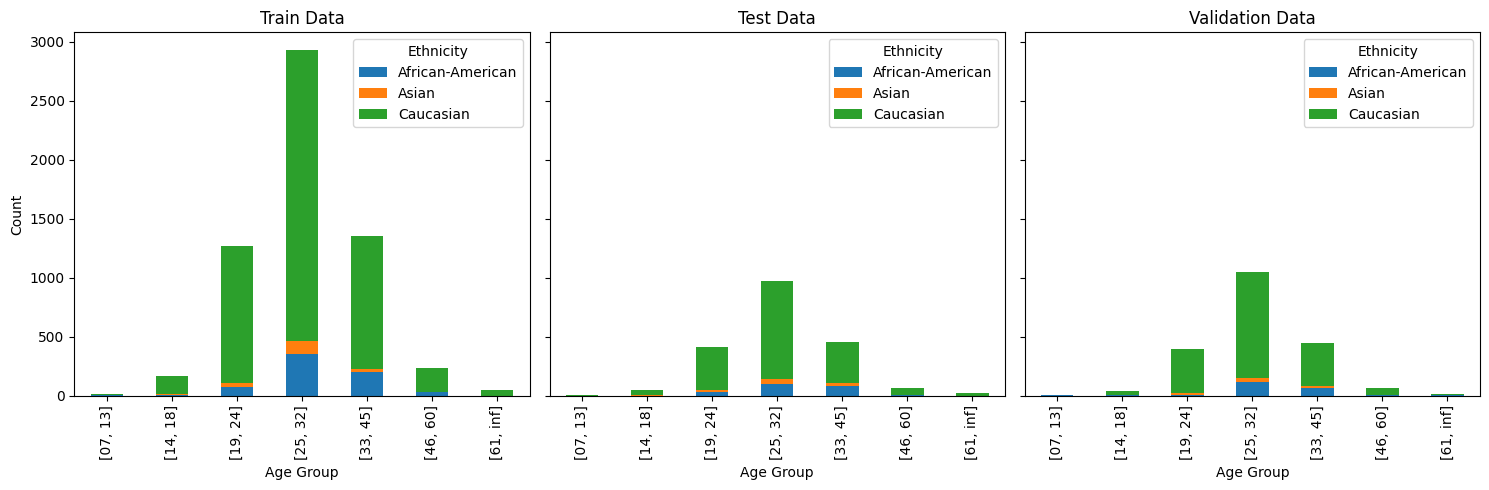

In [12]:
# Plot train data
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

train_grouped.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Train Data')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].legend(title='Ethnicity')

# Plot test data
test_grouped.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Test Data')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')
axes[1].legend(title='Ethnicity')

# Plot validation data
val_grouped.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Validation Data')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Count')
axes[2].legend(title='Ethnicity')

plt.tight_layout()
plt.show()

In [13]:
# Get unique ethnicities
ethnicities = train_csv['Ethnicity'].unique()

datasets = {'Train': train_csv, 'Test': test_csv, 'Validation': validation_csv}

for dataset_name, dataset_df in datasets.items():
    print(f"Dataset: {dataset_name}\n")
    for ethnicity in ethnicities:
        # Filter data by ethnicity
        subset = dataset_df[dataset_df['Ethnicity'] == ethnicity]
        
        # Group the data by 'AgeGroup', and then count the occurrences in each group
        grouped = subset.groupby('AgeGroup').size()
        
        print(f"Ethnicity: {ethnicity}")
        print(grouped)
        print()

Dataset: Train

Ethnicity: Caucasian
AgeGroup
[07, 13]        9
[14, 18]      149
[19, 24]     1155
[25, 32]     2470
[33, 45]     1131
[46, 60]      204
[61, inf]      51
dtype: int64

Ethnicity: African-American
AgeGroup
[07, 13]      1
[14, 18]      7
[19, 24]     69
[25, 32]    355
[33, 45]    198
[46, 60]     28
dtype: int64

Ethnicity: Asian
AgeGroup
[14, 18]      8
[19, 24]     40
[25, 32]    107
[33, 45]     24
dtype: int64

Dataset: Test

Ethnicity: Caucasian
AgeGroup
[07, 13]       5
[14, 18]      41
[19, 24]     359
[25, 32]     830
[33, 45]     354
[46, 60]      63
[61, inf]     18
dtype: int64

Ethnicity: African-American
AgeGroup
[19, 24]    34
[25, 32]    97
[33, 45]    84
[46, 60]     1
dtype: int64

Ethnicity: Asian
AgeGroup
[14, 18]     7
[19, 24]    17
[25, 32]    45
[33, 45]    20
dtype: int64

Dataset: Validation

Ethnicity: Caucasian
AgeGroup
[14, 18]      38
[19, 24]     371
[25, 32]     901
[33, 45]     369
[46, 60]      61
[61, inf]     11
dtype: int64

Ethnici

# Age distribution per gender, per etnicity

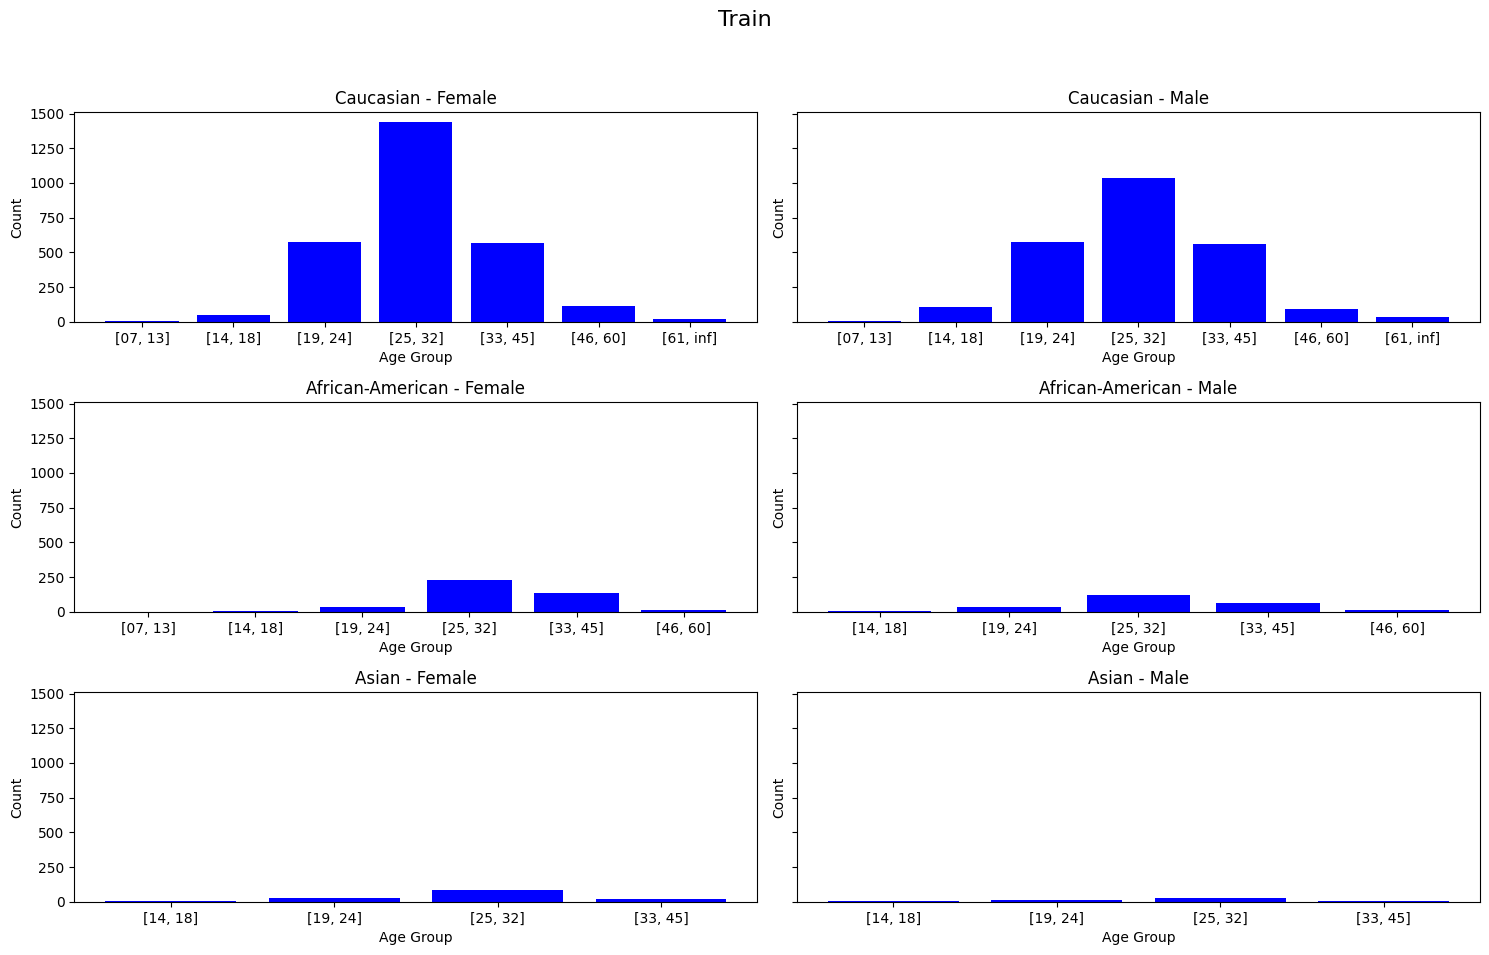

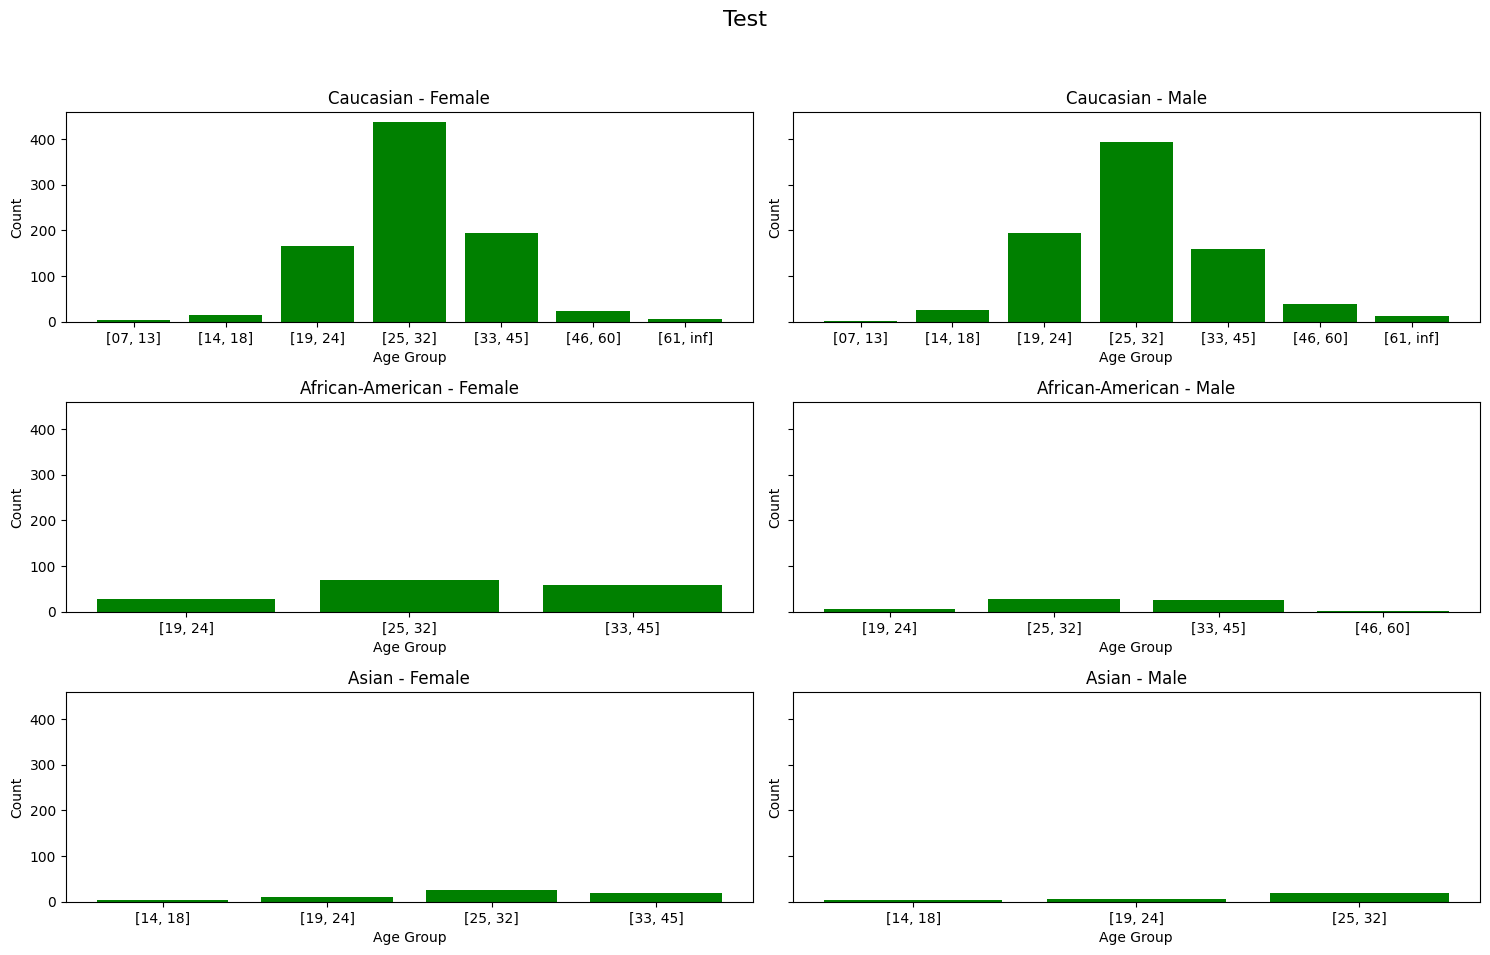

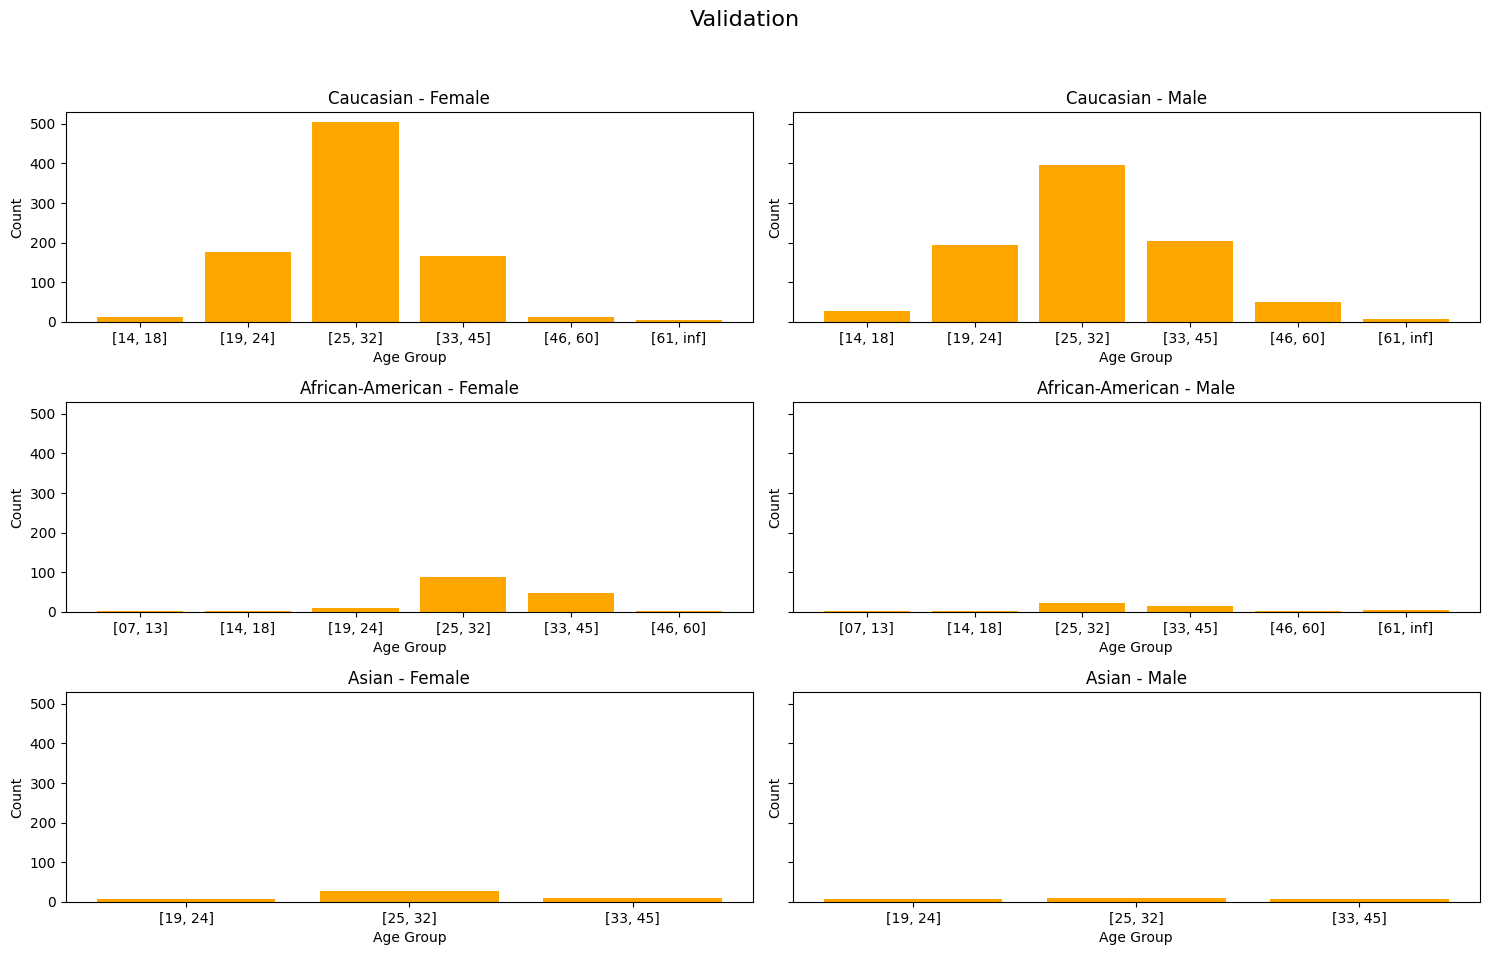

In [14]:
ethnicities = train_csv['Ethnicity'].unique()
genders = train_csv['Gender'].unique()

datasets = {'Train': train_csv, 'Test': test_csv, 'Validation': validation_csv}

colors = {'Train': 'blue', 'Test': 'green', 'Validation': 'orange'}

for dataset_name, dataset_df in datasets.items():
    # Create subplots for each combination of gender and ethnicity
    fig, axes = plt.subplots(len(ethnicities), len(genders), figsize=(15, 10), sharey=True)
    fig.suptitle(dataset_name, fontsize=16)

    for i, ethnicity in enumerate(ethnicities):
        for j, gender in enumerate(genders):
            # Filter data by ethnicity and gender
            subset = dataset_df[(dataset_df['Ethnicity'] == ethnicity) & (dataset_df['Gender'] == gender)]
            
            # Group the data by 'AgeGroup', and then count the occurrences in each group
            grouped = subset.groupby('AgeGroup').size()
            
            # Plot data
            if len(ethnicities) > 1 or len(genders) > 1:
                axes[i, j].bar(grouped.index, grouped.values, color=colors[dataset_name])
                axes[i, j].set_title(f'{ethnicity} - {gender}')
                axes[i, j].set_xlabel('Age Group')
                axes[i, j].set_ylabel('Count')
            else:
                axes.bar(grouped.index, grouped.values, color=colors[dataset_name])
                axes.set_title(f'{ethnicity} - {gender}')
                axes.set_xlabel('Age Group')
                axes.set_ylabel('Count')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to avoid overlapping titles
    plt.show()

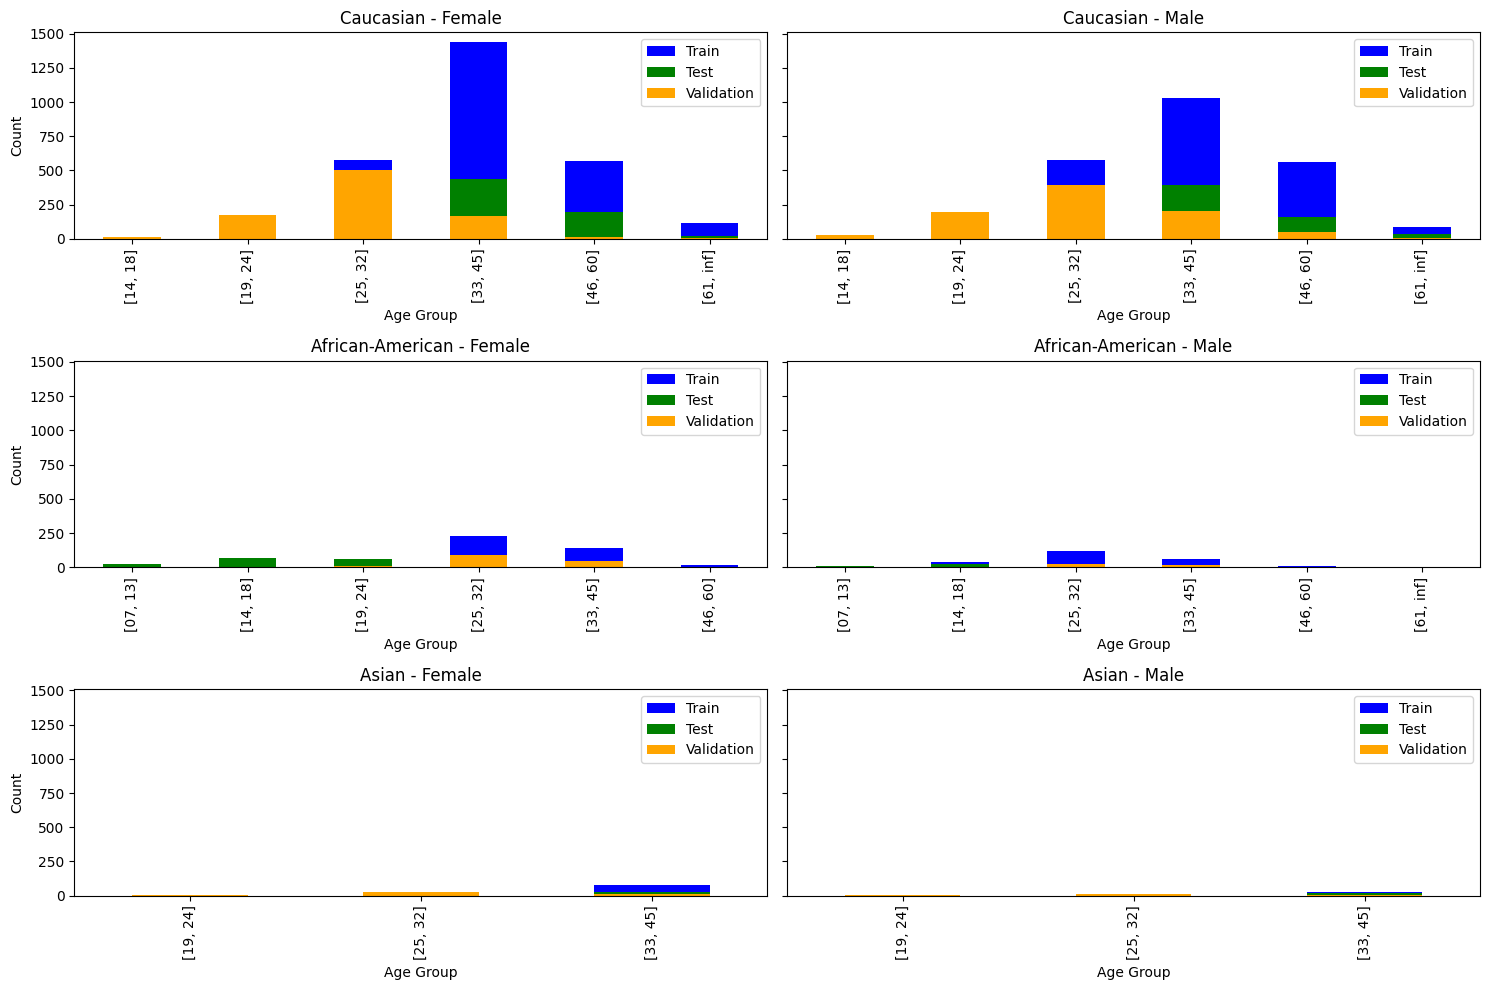

In [15]:
ethnicities = train_csv['Ethnicity'].unique()
genders = train_csv['Gender'].unique()

# Define colors for each dataset
colors = {'Train': 'blue', 'Test': 'green', 'Validation': 'orange'}

# Create subplots for each combination of gender and ethnicity
fig, axes = plt.subplots(len(ethnicities), len(genders), figsize=(15, 10), sharey=True)

for i, ethnicity in enumerate(ethnicities):
    for j, gender in enumerate(genders):
        # Filter data by ethnicity and gender
        train_subset = train_csv[(train_csv['Ethnicity'] == ethnicity) & (train_csv['Gender'] == gender)]
        test_subset = test_csv[(test_csv['Ethnicity'] == ethnicity) & (test_csv['Gender'] == gender)]
        val_subset = validation_csv[(validation_csv['Ethnicity'] == ethnicity) & (validation_csv['Gender'] == gender)]
        
        # Group the data by 'AgeGroup', and then count the occurrences in each group
        train_grouped = train_subset.groupby('AgeGroup').size()
        test_grouped = test_subset.groupby('AgeGroup').size()
        val_grouped = val_subset.groupby('AgeGroup').size()
        
        # Plot data with different colors for each dataset
        train_grouped.plot(kind='bar', color=colors['Train'], stacked=True, ax=axes[i, j], label='Train')
        test_grouped.plot(kind='bar', color=colors['Test'], stacked=True, ax=axes[i, j], label='Test')
        val_grouped.plot(kind='bar', color=colors['Validation'], stacked=True, ax=axes[i, j], label='Validation')

        axes[i, j].set_title(f'{ethnicity} - {gender}')
        axes[i, j].set_xlabel('Age Group')
        axes[i, j].set_ylabel('Count')
        axes[i, j].legend()

plt.tight_layout()
plt.show()

In [16]:
# Get unique ethnicities and genders
ethnicities = train_csv['Ethnicity'].unique()
genders = train_csv['Gender'].unique()

datasets = {'Train': train_csv, 'Test': test_csv, 'Validation': validation_csv}

for dataset_name, dataset_df in datasets.items():
    print(f"Dataset: {dataset_name}\n")
    for ethnicity in ethnicities:
        for gender in genders:
            # Filter data by ethnicity and gender
            subset = dataset_df[(dataset_df['Ethnicity'] == ethnicity) & (dataset_df['Gender'] == gender)]
            
            # Group the data by 'AgeGroup', and then count the occurrences in each group
            grouped = subset.groupby('AgeGroup').size()
            
            print(f"Ethnicity: {ethnicity} - Gender: {gender}")
            print(grouped)
            print()

Dataset: Train

Ethnicity: Caucasian - Gender: Female
AgeGroup
[07, 13]        4
[14, 18]       46
[19, 24]      577
[25, 32]     1437
[33, 45]      569
[46, 60]      113
[61, inf]      19
dtype: int64

Ethnicity: Caucasian - Gender: Male
AgeGroup
[07, 13]        5
[14, 18]      103
[19, 24]      578
[25, 32]     1033
[33, 45]      562
[46, 60]       91
[61, inf]      32
dtype: int64

Ethnicity: African-American - Gender: Female
AgeGroup
[07, 13]      1
[14, 18]      4
[19, 24]     33
[25, 32]    232
[33, 45]    138
[46, 60]     16
dtype: int64

Ethnicity: African-American - Gender: Male
AgeGroup
[14, 18]      3
[19, 24]     36
[25, 32]    123
[33, 45]     60
[46, 60]     12
dtype: int64

Ethnicity: Asian - Gender: Female
AgeGroup
[14, 18]     2
[19, 24]    30
[25, 32]    81
[33, 45]    20
dtype: int64

Ethnicity: Asian - Gender: Male
AgeGroup
[14, 18]     6
[19, 24]    10
[25, 32]    26
[33, 45]     4
dtype: int64

Dataset: Test

Ethnicity: Caucasian - Gender: Female
AgeGroup
[07, 13]

In [17]:
9756 - 6006

3750